## import

In [23]:
import os
from scipy.io import wavfile
import matplotlib.pyplot as plt

## sampling function

In [65]:
def readwav(filepath, filename):
    sample_rate, samples = wavfile.read(filepath+filename)
    return samples, sample_rate

## print Sampled wav file

In [82]:
def print_samples(filepath, filename):
    sample_rate, samples = wavfile.read(filepath + filename)
    samples_num = samples.shape[0] # len(samples)
    print('Sample Number : {}'.format(samples_num))
    print('Sample rate : {}'.format(sample_rate))
    print('Samples.shape : {}'.format(samples.shape))
    print('wav time : {} s'.format(samples_num/sample_rate))
    print(type(samples))
    print(samples)
    
# print_samples('./sample_wav/','KaiSpeech_000020.wav')

Sample Number : 132608
Sample rate : 16000
Samples.shape : (132608,)
wav time : 8.288 s
<class 'numpy.ndarray'>
[18 18 17 ... 47 49 51]
b'RIFF$\x0c\x04\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00\x80>\x00\x00\x00}\x00\x00\x02\x00\x10\x00data\x00\x0c\x04\x00\x12\x00\x12\x00\x11\x00\x12\x00\x12\x00\x0f\x00\x0e\x00\x0b\x00\t\x00\t\x00\x06\x00\x07\x00\x07\x00\x08\x00\t\x00\x07\x00\x08\x00\x07\x00\x08\x00\x07\x00\n'
b'\x00\x0c\x00\t\x00\x0b\x00\n'


## Spectrogram function

In [2]:
from scipy import signal
import numpy as np

def log_specgram(audio, sample_rate, window_size=20, step_size=10,eps=1e-10):
    # nperseg: Length of each segment
    # noverlap: Number of points to overlap between segment
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                            fs = sample_rate,
                                            window = 'hann',
                                            nperseg = nperseg,
                                            noverlap = noverlap,
                                            detrend = False)
    return freqs, times, np.log(spec.T.astype(np.float32)+eps)

## Amplitude, Spectrogram plot

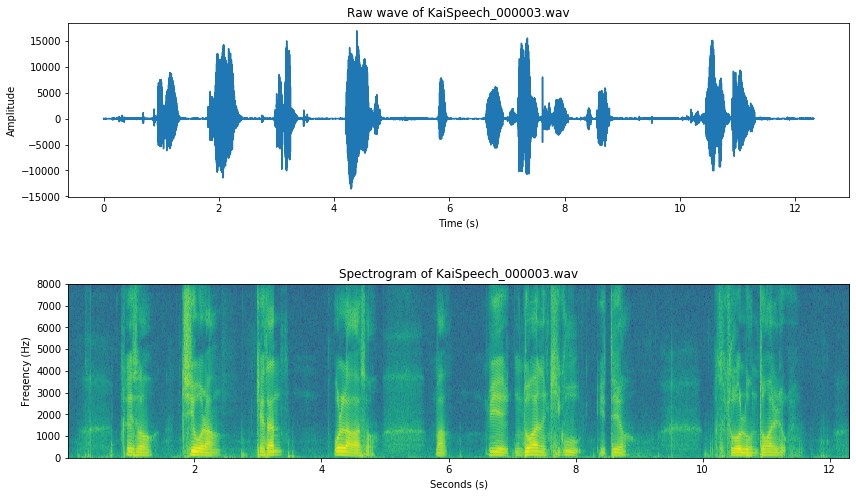

In [96]:
def plot_amp_and_specgram(samples, sample_rate, filename, mode = "normal"):
    # get log spectrogram
    freqs, times, spectrogram = log_specgram(samples, sample_rate)
    
    # plot figure size
    fig = plt.figure(figsize=(14,8))
    
    # ax1 : amplitude and time
    ax1 = fig.add_subplot(211)
    ax1.set_title('Raw wave of '+filename)
    ax1.set_ylabel('Amplitude')
    ax1.set_xlabel('Time (s)')
    ax1.plot(np.linspace(0, len(samples)/sample_rate, len(samples)), samples)

    # spectrogram
    ax2 = fig.add_subplot(212)
    ax2.set_title('Spectrogram of '+ filename)
    ax2.set_ylabel('Freqency (Hz)')
    ax2.set_xlabel('Seconds (s)')
    ax2.imshow(spectrogram.T, aspect='auto', origin='lower',
              extent=[times.min(), times.max(), freqs.min(), freqs.max()])

    # get distance between fig1 and fig2
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
    if mode == 'normal':
        plt.savefig("./result_img/"+filename+".png")
    elif mode == 'trunc':
        plt.savefig("./result_img/"+filename+"(t)"+".png")
    
plot_amp_and_specgram(samples, sample_rate, filename)

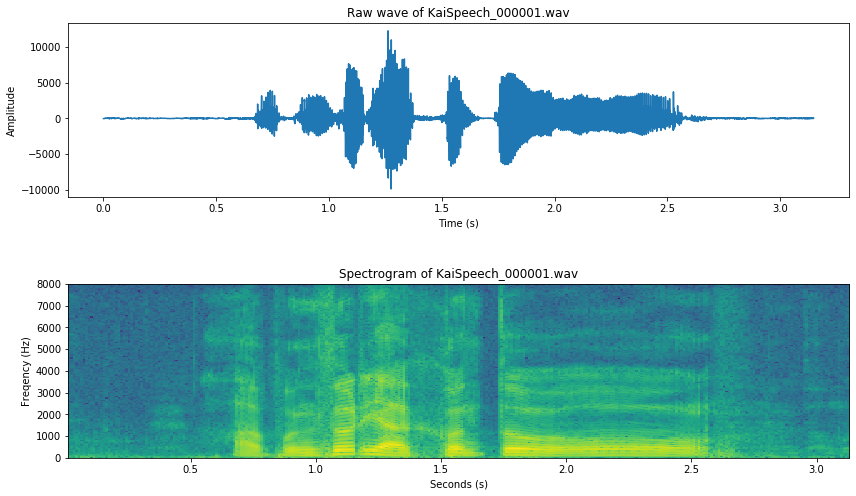

In [70]:
plot_amp_and_specgram(samples, sample_rate, filename)

## Compare Original and VAD tested

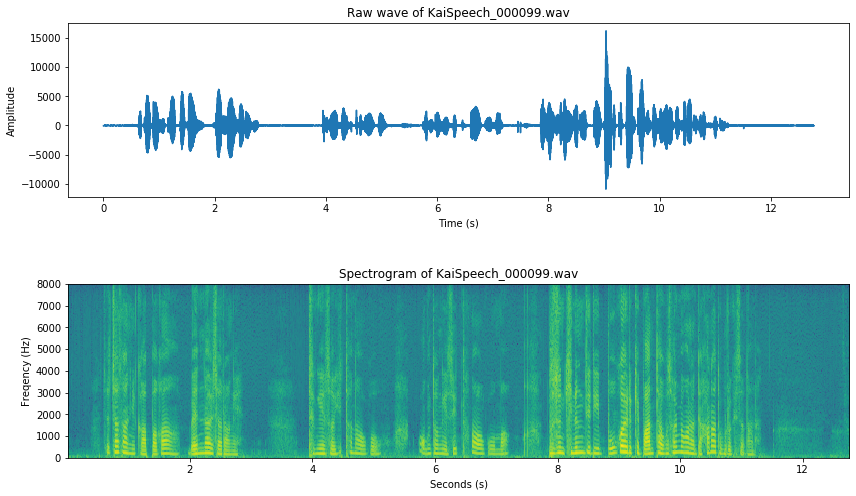

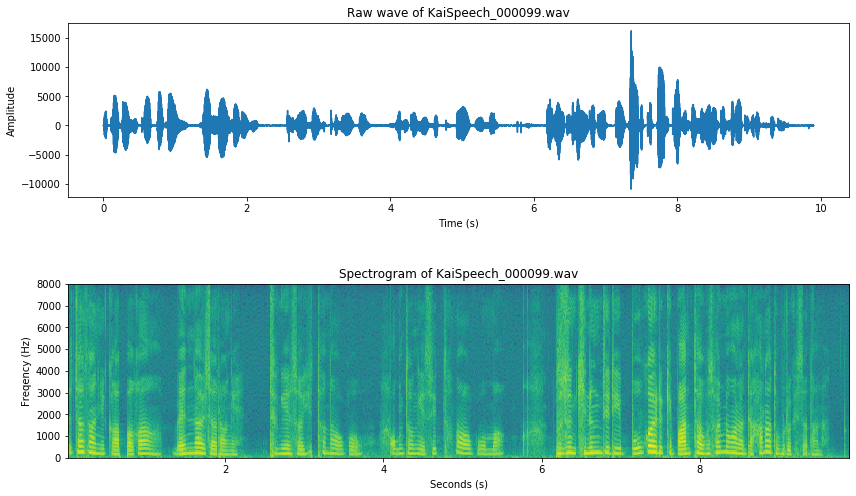

In [104]:
# path
filepath = "./sample_wav/"
truncpath = "./sample_truncated/"

# filename
filename = "KaiSpeech_000099.wav"

# read wav fiile
samples, sample_rate = readwav(filepath, filename)
truncsamples, trunc_rate = readwav(truncpath, filename)

# plot amp and spec
plot_amp_and_specgram(samples, sample_rate, filename, mode = "normal")
plot_amp_and_specgram(truncsamples, trunc_rate, filename, mode = "trunc")

## Trouble Shooting

- print(len(np.linspace(0,len(samples)/sample_rate,len(samples))))
- print(len(samples))
- np.linspace(from, to, num), num defualt = 50
- matplotlib must match x and y
`print(len(np.linspace(0,len(samples)/sample_rate,len(samples))))
print(len(samples))`
- slicing[ start : end : step ]
- also possible to use len() to get length of ndarray
- print("string { }".format(Value))
- to get value from tuple, use index

## Variable
- **sample_rate:** sample rate of audio file
- **samples:** ndarray type audio file

### Reference
- https://musicinformationretrieval.com/ipython_audio.html